# DataScience Intern at Oasis Infobyte

# =======================================================

# Task 5  : Sales Prediction Using Python

# Name   : Saranya D

# =======================================================

# Importing packages

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import seaborn as sns

Uploading Dataset

In [120]:
sales_df = pd.read_csv("Advertising.csv")

Getting details about the uploaded dataset

In [121]:
print(sales_df.head(10))

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
5           6    8.7   48.9       75.0    7.2
6           7   57.5   32.8       23.5   11.8
7           8  120.2   19.6       11.6   13.2
8           9    8.6    2.1        1.0    4.8
9          10  199.8    2.6       21.2   10.6


In [122]:
print(sales_df.tail(10))

     Unnamed: 0     TV  Radio  Newspaper  Sales
190         191   39.5   41.1        5.8   10.8
191         192   75.5   10.8        6.0    9.9
192         193   17.2    4.1       31.6    5.9
193         194  166.8   42.0        3.6   19.6
194         195  149.7   35.6        6.0   17.3
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4


In [123]:
sales_df.size

1000

In [124]:
sales_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [125]:
print(sales_df.head(10))

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2
8    8.6    2.1        1.0    4.8
9  199.8    2.6       21.2   10.6


In [126]:
sales_df[['TV','Radio', 'Newspaper']] = sales_df[['TV','Radio', 'Newspaper']].astype('int')
print(sales_df.head(10))

    TV  Radio  Newspaper  Sales
0  230     37         69   22.1
1   44     39         45   10.4
2   17     45         69    9.3
3  151     41         58   18.5
4  180     10         58   12.9
5    8     48         75    7.2
6   57     32         23   11.8
7  120     19         11   13.2
8    8      2          1    4.8
9  199      2         21   10.6


In [127]:
sales_df.shape

(200, 4)

In [128]:
sales_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [129]:
sales_df.duplicated().sum()

0

In [130]:
sales_df.size

800

In [131]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.00000,200.000000,200.000000
mean,146.570000,22.79000,30.100000,14.022500
std,85.824731,14.82582,21.769233,5.217457
min,0.000000,0.00000,0.000000,1.600000
25%,73.750000,9.75000,12.000000,10.375000
50%,149.000000,22.50000,25.000000,12.900000
75%,218.250000,36.00000,45.000000,17.400000
max,296.000000,49.00000,114.000000,27.000000


In [132]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    int32  
 1   Radio      200 non-null    int32  
 2   Newspaper  200 non-null    int32  
 3   Sales      200 non-null    float64
dtypes: float64(1), int32(3)
memory usage: 4.0 KB


# Data Visualisation

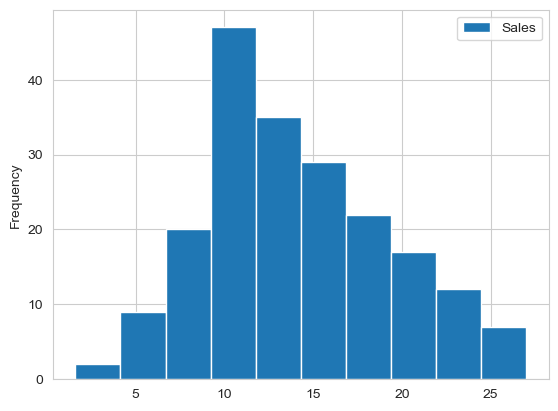

In [133]:
sales_df[['Sales']].plot(kind = "hist", bins = 10)
plt.show()

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


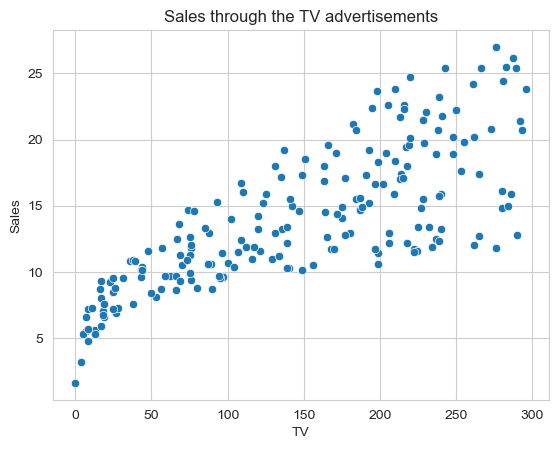

In [134]:
sns.scatterplot(sales_df['TV'], sales_df['Sales'])
plt.title('Sales through the TV advertisements')
plt.show()

Advertisement through the TV is steadily increasing

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


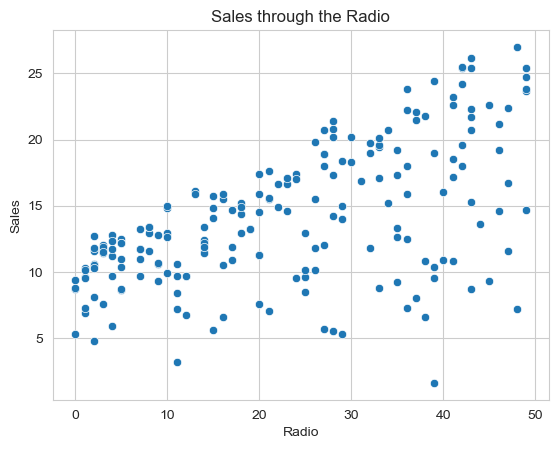

In [135]:
sns.scatterplot(sales_df['Radio'], sales_df['Sales'])
plt.title("Sales through the Radio")
plt.show()

For Sales Advertisement through the Radio is also increases but not like TV

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


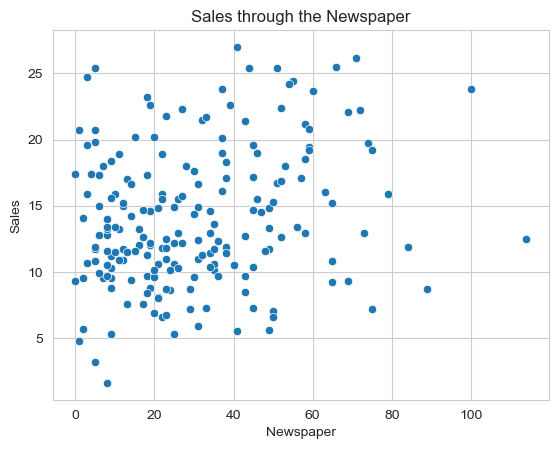

In [136]:
sns.scatterplot(sales_df['Newspaper'], sales_df['Sales'])
plt.title("Sales through the Newspaper")
plt.show()


For Sales the advertisement through the Newspaper is increases high at first, after sometimes this method unused

# Correlation Matrix

In [144]:
corr_mat = sales_df.corr().round(2)
print(corr_mat)

             TV  Radio  Newspaper  Sales
TV         1.00   0.06       0.06   0.78
Radio      0.06   1.00       0.35   0.58
Newspaper  0.06   0.35       1.00   0.23
Sales      0.78   0.58       0.23   1.00


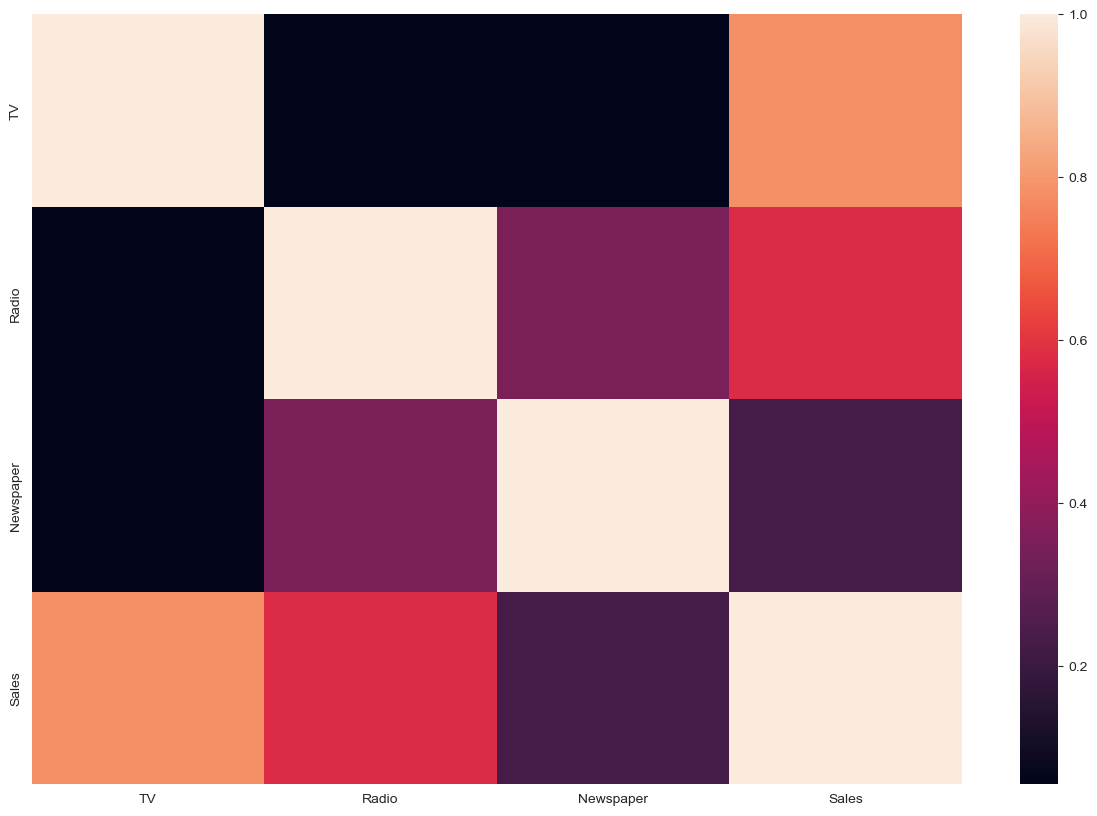

In [145]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,10))
sns.heatmap(sales_df.corr())
plt.show()

From the above relation we can say that TV is maximum correlated with Sales

# Data Preparation

In [146]:
X=sales_df[['TV', 'Radio', 'Newspaper']]
Y=sales_df['Sales']

In [147]:
print(X)

      TV  Radio  Newspaper
0    230     37         69
1     44     39         45
2     17     45         69
3    151     41         58
4    180     10         58
..   ...    ...        ...
195   38      3         13
196   94      4          8
197  177      9          6
198  283     42         66
199  232      8          8

[200 rows x 3 columns]


In [148]:
print(Y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


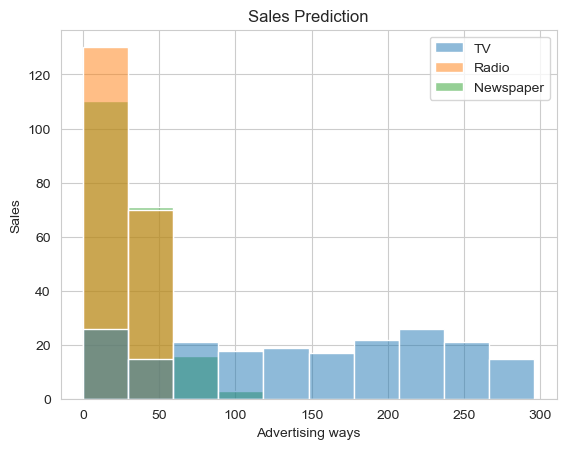

In [149]:
sns.histplot(X,bins = 10)
plt.ylabel('Sales')
plt.xlabel('Advertising ways')
plt.title("Sales Prediction")
plt.show()

The way of advertising using TV is in a steady position

# Train_test_split

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

In [151]:
print(X.shape)
print(Y_new.shape)

(200, 3)
(200,)


Checking the rows of the test and training models

In [153]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [154]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Finding Intercept and Coefficient

In [155]:
print("Intercept :",model.intercept_.round(2))
print("Coefficient :",model.coef_.round(2))


Intercept : 2.74
Coefficient : [0.05 0.19 0.  ]


In [156]:
print((model.intercept_+model.coef_)*X.mean())

TV           408.754381
Radio         66.753858
Newspaper     82.645210
dtype: float64


# Prediction

In [157]:
# Predicting the test models

In [158]:
y_test_predicted = model.predict(X_test).round(2)
print(y_test_predicted)
print(type(y_test_predicted))

[13.78 14.62 10.63  9.86 10.02 18.24 15.17  3.5  20.5  11.84 14.86 12.76
 21.04 14.31 15.68 16.93 10.11 16.55  9.52 12.4  16.86 10.13  7.97 13.78
 21.03 14.31  7.06  7.42 15.4  13.43 14.93 10.02 11.89 16.36  6.37  9.57
 12.99 20.35  8.98 11.26]
<class 'numpy.ndarray'>


In [159]:
y_test_predicted.shape

(40,)

# Mean Square Error

In [160]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_test_predicted)
print("Mean_Squared_Error is :",mse)

Mean_Squared_Error is : 2.1878525


# Mean Absolute Error

In [161]:
from sklearn.metrics import mean_absolute_error as abs

In [162]:
mae = abs(Y_test, y_test_predicted)

In [163]:
print("Mean_Absolute_Error is :", mae.mean())

Mean_Absolute_Error is : 1.1342500000000002


# RMSE

In [164]:
rmse = np.sqrt(mse)
print("RMSE :",rmse)

RMSE : 1.4791391077244898


# r2_score

In [165]:
from sklearn.metrics import r2_score

In [166]:
r2 = r2_score(Y_test, y_test_predicted)


In [167]:
print('r2_score :',r2*100)

r2_score : 84.63357418154044


# Thus the sales advertisement with machine learning using python was predicted

# Thankyou